<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-NN" data-toc-modified-id="k-NN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>k-NN</a></span><ul class="toc-item"><li><span><a href="#KNeighborsClassifier-분석" data-toc-modified-id="KNeighborsClassifier-분석-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>KNeighborsClassifier 분석</a></span></li><li><span><a href="#k-NN-회귀" data-toc-modified-id="k-NN-회귀-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>k-NN 회귀</a></span></li><li><span><a href="#KNeighborsRegressor-분석" data-toc-modified-id="KNeighborsRegressor-분석-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>KNeighborsRegressor 분석</a></span></li><li><span><a href="#장단점과-매개변수" data-toc-modified-id="장단점과-매개변수-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>장단점과 매개변수</a></span></li></ul></li></ul></div>

In [10]:
from IPython.display import Image
from IPython.core.display import HTML
import mglearn
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# k-NN
k-NN 알고리즘은 가장 간단한 머신러닝 알고리즘이다. 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 과정의 전부이다. 새로운 데이터 포인트에 대해 예측할 땐 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트 즉 '최근접 이웃'을 찾는다.

k-최근접 이웃 분류
가장 간단한 k-NN 알고리즘은 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측에 사용한다. 단순히 이 훈련 데이터 포인트의 출력이 예측된다. forge 데이터셋을 이렇게 분류한 예이다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


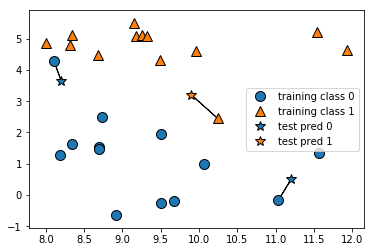

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

이 그림에는 데이터 포인트 3개를 추가했다. (별모양으로 표시) 그리고 추가한 각 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 연결했다. 1-최근접 이웃 알고리즘의 예측은 이 데이터 포인트의 레이블이 된다 (같은 색으로 연결)

가장 가까운 이웃 하나가 아니라 임의의 k개를 선택할 수 있다. 그래서 k-최근접 이웃 알고리즘이라 부른다. 둘 이상의 이웃을 선택할 때는 레이블을 정하기 위해 투표를 한다. 즉 테스트 포인트 하나에 대해 클래스 0에 속한 이웃이 몇 개인지, 그리고 클래스 1에 속한 이웃이 몇 개인지를 센다. 그리고 이웃이 더 많은 클래스를 레이블로 지정한다. 다시 말해 k-최근접 이웃 중 다수의 클래스가 레이블이 된다. 다음은 세 개의 최근접 이웃을 사용하는 예이다. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


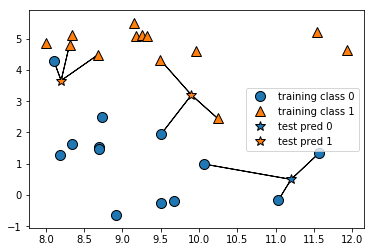

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

여기에서도 예측은 연결된 데이터 포인트의 색으로 나타난다. 새 데이터 포인트 중 왼쪽 위의 것은 이웃을 하나만 사용했 때와 예측이 달라진 것을 알 수 있다.  
이 그림은 이진 분류 문제지만 클래스가 다수인 데이터셋에도 같은 방법을 적용할 수 있다. 클래스가 여러 개일 때도 각 클래스에 속한 이웃이 몇 개인지 헤아려 가장 많은 클래스를 예측값으로 사용한다.

이제 사이킷런을 사용해 k-최근접 이웃 알고리즘을 어떻게 적용하는지 살펴보자. 먼저 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


다음으로 KNeighborsClassifier를 임포트하고 객체를 만든다. 이때 이웃의 수 같은 매개변수를 지정한다. 여기서는 이웃의 수를 3으로 지정한다

In [5]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

이제 훈련 세트를 사용하여 분류 모델을 학습시킨다. KNeighborsClassifier에서의 학습은 예측할 때 이웃을 찾을 수 있도록 데이터를 저장하는 것이다.

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터에 대해 predict 메서드를 호출해서 예측한다. 테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산한 다음 가장 많은 클래스를 찾는다.

In [7]:
print(clf.predict(X_test))

[1 0 1 0 1 0 0]


모델이 얼마나 잘 일반화 되었는지 평가하기 위해 score메서드에 테스트 데이터와 테스트 레이블을 넣어 호출한다.

In [8]:
clf.score(X_test, y_test)

0.8571428571428571

이 모델의 정확도는 약 86%이다. 즉 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다.

## KNeighborsClassifier 분석
2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy 평면에 그려볼 수 있다. 그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠한다. 이렇게 하면 알고리즘이 클래스 0과 클래스1로 지정한 영역으로 나뉘는 결정 경계decision boundary를 볼 수 있다. 다음 코드는 이웃이 하나, 셋, 아홉 개일 때의 결정 경계를 보여준다.

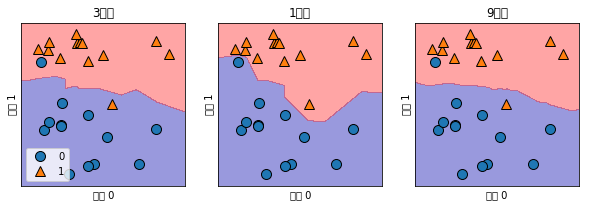

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([3, 1, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f"{n_neighbors}이웃")
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
#n_neighbors 값이 각기 다른 최근접 이웃 모델이 만든 결정 경계

왼쪽 그림을 보면 이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있다. 이웃의 수를 늘릴수록 결정 경계는 더 부드러워진다. 부드러운 경계는 더 단순한 모델을 의미한다. 다시 말해 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 복잡도는 낮아진다. 훈련 데이터 전체 개수를 이웃의 수로 지정하는 극단적인 경우에는 모든 테스트 포인트가 같은 이웃을 가지게 되므로 테스트 포인트에 대한 예측은 모두 같은 값이 된다. 즉 훈련 세트에서 가장 많은 데이터 포인트를 가진 클래스가 예측값이 된다.

앞서 이야기한 모델의 복잡도와 일반화 사이의 관계를 입증할 수 있는지 살펴보겠다. 이를 위해 실제 데이터인 유방암 데이터 셋을 사용한다. 먼저 훈련 세트와 테스트 세트로 나눈다. 그런 다음 이웃의 수를 달리하여 훈련 세트와 테스트 세트의 성능을 평가한다.

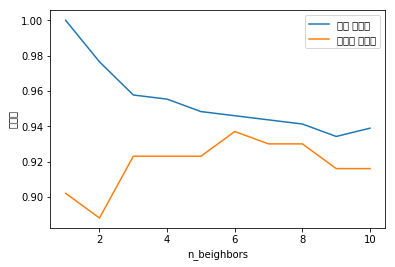

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_beighbors")
plt.legend()
# n_neighbors 변화에 따른 훈련 정확도와 테스트 정확도

이 그림은 n_neighbors 수에 따른 훈련 세트와 테스트 세트 정확도를 보여준다. 실제 이런 그래프는 매끈하게 나오지 않지만, 여기서도 과대적합과 과소적합의 특징을 볼 수 있다. 최근접 이웃의 수가 하나일 때는 훈련 데이터에 대한 예측이 완벽하다. 하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어든다. 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮다. 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만든다는 것을 설명해준다. 반대로 이웃을 10개 사용했을 때는 모델이 너무 단순해서 정확도는 더 나빠진다. 정확도가 가장 좋을 때는 중간 정도인 여섯 개를 사용한 경우이다. 이 그래프의 범위를 눈여겨보면 가장 나쁜 정확도도 88% 여서 수긍할만하다.

## k-NN 회귀
k-NN 알고리즘은 회귀분석에도 쓰인다. 이번에는 wave 데이터셋을 이용해서 이웃이 하나인 최근접 이웃을 사용해본다. x축에 세 개의 테스트 데이터를 흐린 별 모양으로 표시한다. 최근접 이웃을 한 개만 이용할 때 예측은 그냥 가장 가까운 이웃의 타깃값이다. 이 예측은 진한 별 모양으로 표시한다.

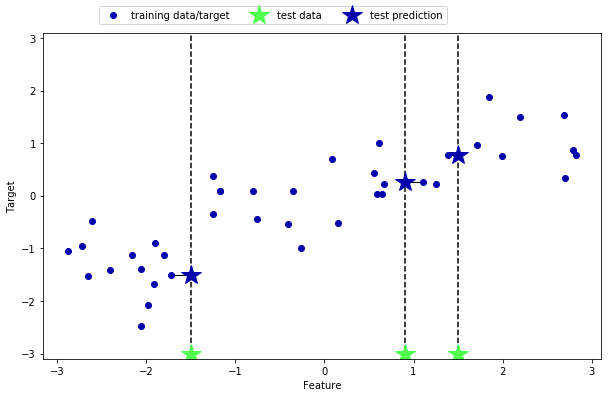

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

사이킷런에서 회귀를 위한 k-NN 알고리즘은 KNeighborsRegressor 에 구현되어 있다. 사용법은 KNeighborsClassifier과 유사하다

In [20]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

그리고 테스트 세트에 대해 예측을 한다.

In [21]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

역시 score 메서드를 사용해 모델을 평가한다. 이 메서드는 회귀일 땐 R^2 값을 반환한다. 결졍 계수라고도 하는 R^2값은 회귀 모델에서 예측의 적합도를 0과 1사이의 값으로 계산한 것이다. 1은 예측이 완벽한 경우이고, 0은 훈련 세트의 출력값인 y_train의 평균으로만 예측하는 모델인 경우이다.

In [22]:
reg.score(X_test, y_test)

0.8344172446249604

83%로 비교적 잘 맞는다.

## KNeighborsRegressor 분석
이 1차원 데이터셋애 대해 가능한 모든 특성 값을 만들어 예측해볼 수 있다. 이를 위해 x축을 따라 많은 포인트를 생성해 테스트 데이터셋을 만든다.

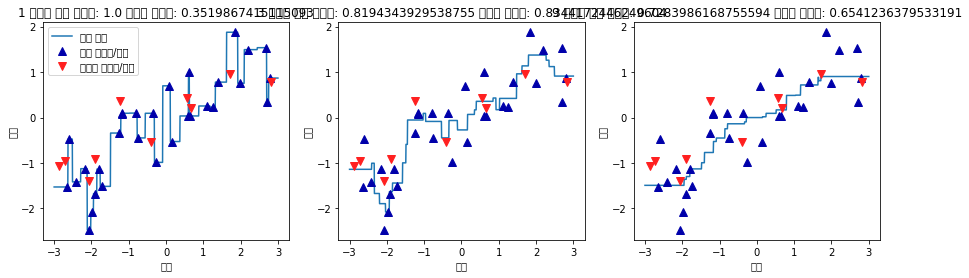

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# -3과 3 사이에 1000개 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(f"{n_neighbors} 이웃의 훈련 스코어: {reg.score(X_train, y_train)} 테스트 스코어: {reg.score(X_test, y_test)}")
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이 그림에서 보이듯 이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나간다. 이는 매우 불안정한 예측을 만든다. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게 된다.

## 장단점과 매개변수
일반적으로 KNeighbors 분류기에 중요한 매개변수는 두 개이다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수이다. 실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야 한다. 거리 재는 방법을 고르는 문제는 다루지 않지만, 기본적으로 여러 환경에서 잘 동작하는 유클리디안 거리 방식을 사용한다.

k-NN의 장점은 **이해하기 쉬운 모델**이라는 점이다. 그리고 많이 조정하지 않아도 자주 좋은 성능을 발휘한다. 더 복잡한 알고리즘을 적용해보기 전에 시도해볼 수 있는 좋은 시작점이다. 보통 최근접 이웃 모델은 매우 빠르게 만들 수 있지만, 훈련 세트가 매우 크면 (특성의 수나 샘플의 수가 큰 경우) 예측이 느려진다. k-NN 알고리즘을 사용할 땐 데이터를 전처리 하는 과정이 중요하다. 그리고 많은 특성을 가진 데이터셋에는 잘 동작하지 않으며, 특성 값 대부분이 0인 (희소한) 데이터 셋과는 특히 잘 작동하지 않는다.

k-NN 알고리즘이 이해하기 쉽지만, 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰이지 않는다. 이런 단점이 없는 알고리즘이 바로 선형 모델이다.